# K-means法のテスト
教師なし学習の、クラスタリング手法の方法の一つ。データ間の近さで分類をする。

ここではライブラリを使った実装をする。
データは3種類のアヤメのデータを集めたものを持ってくる。
https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88

In [ ]:
#ライブラリを使った実装

import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

# iris データセットをロード
iris = datasets.load_iris()
data = iris['data']

# k-means モデルの作成
# クラスタ数を指定(3)
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# クラスタリング結果ラベルの取得
labels = model.labels_

# ---描画---
# キャンバスを作成
plt.figure(1)

ldata = data[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3], color='green')

ldata = data[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3], color='red')

ldata = data[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3], color='blue')

plt.show()

# SVMを試す
scikit-leanを利用して実装する。
## データを作成
iris-dataを学習用データとテストデータに分割する。train_test_split関数を利用して75%/25%に分ける。

[train_test_split関数]

|引数        |内容                                  |
|------------|--------------------------------------|
|第一引数    |特徴行列(X)                           |
|第二引数    |目的変数(y)                           |
|test_size   |テスト用のデータを何割の大きさにするか|
|random_state|データを分割する際の乱数のシード値    |

---
## 参考
- https://www.pc-koubou.jp/magazine/22439
- https://qiita.com/Amtkxa/items/61d4316324c66b766ddf
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

In [ ]:
#4つの特徴量で分類

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm

#データを作成
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25,  random_state=0)

#学習をさせる
clf=svm.SVC(gamma="scale") #classfication
clf.fit(X_train, y_train)

#テスト
print('正解率',clf.score(X_test, y_test))

正解率 0.9736842105263158


正解率 0.7631578947368421


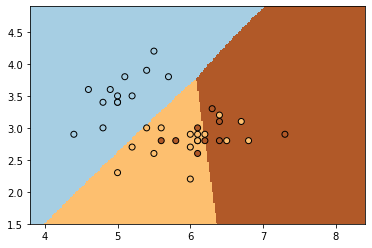

In [ ]:
#2つずつの特徴量で分類

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

#データを作成
iris_dataset = load_iris()
X = iris_dataset.data[:, [0, 1]] 
X_train, X_test, y_train, y_test = train_test_split(X, iris_dataset['target'], test_size=0.25,  random_state=0)

#学習をさせる
clf=svm.SVC(gamma="scale") #classfication
clf.fit(X_train, y_train)


print('正解率',clf.score(X_test, y_test))

# グラフの設定
h = .02 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# カラープロットへ
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# プロット
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
